In [ ]:
import numpy as np

In [ ]:
a = np.float32(1.)
b = np.float32(100000)
c = np.float32(-0.01) 

$$ ax^2 + bx + c = 0$$

In [ ]:
x1 = (-b + np.sqrt(b * b - 4 * a * c, dtype=np.float32)) / (2 * a)
x2 = (-b - np.sqrt(b * b - 4 * a * c, dtype=np.float32)) / (2 * a)
print(x1, x2)

0.0 -100000.0


In [ ]:
print(a * x1 * x1 + b * x1 + c)
print(a * x2 * x2 + b * x2 + c)

-0.009999999776482582
-0.009999999776482582


In [ ]:
x1 = 2 * c / (-b - np.sqrt(b * b - 4 * a * c, dtype=np.float32))
x2 = -b/a - x1
print(x1,x2)

9.999999776482582e-08 -100000.0000001


In [ ]:
print(a * x1 * x1 + b * x1 + c)
print(a * x2 * x2 + b * x2 + c)

1.0000680839006293e-14
2.2910535335540771e-07


In [ ]:
n = 100
A = np.random.randn(n, n)
B = np.random.randn(n, n)
C = A @ B 

In [ ]:
from numba import jit
def matmat(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i,j] += A[i, k] * B[k, j]
    return C

@jit(nopython=True)
def matmat_numba(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i,j] += A[i, k] * B[k, j]
    return C


In [ ]:
C_manual = matmat(A, B)
C_jit = matmat_numba(A, B)

In [ ]:
np.linalg.norm(C - C_manual), np.linalg.norm(C_jit - C_manual), 

(2.35093678307626e-13, 0.0)

In [ ]:
%timeit matmat(A, B)
%timeit matmat_numba(A, B)
%timeit A @ B

1 loop, best of 5: 879 ms per loop
1000 loops, best of 5: 1.17 ms per loop
The slowest run took 31.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 131 µs per loop


In [ ]:
import torch 

In [ ]:
A = torch.randn((n, n), device="cuda")
B = torch.randn((n, n), device="cuda")

In [ ]:
%timeit A @ B

The slowest run took 3581.11 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 19.8 µs per loop


In [ ]:
A = A.to("cpu")
B = B.to("cpu")
%timeit A @ B

The slowest run took 1107.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 41.5 µs per loop


In [ ]:
n = 100
k = 10
A = np.random.randn(n, k)
A = A @ A.T 
print(A.shape)
s = np.linalg.svd(A, compute_uv=False)
print(s)
print(np.linalg.matrix_rank(A, tol=1e-18))
print(np.linalg.matrix_rank(A + 1e-3 * np.random.randn(n, n)))

(100, 100)
[1.53824787e+02 1.38555438e+02 1.25694717e+02 1.00368821e+02
 9.36767190e+01 8.83411892e+01 7.67232970e+01 6.71518093e+01
 5.88306213e+01 4.74490885e+01 1.94284609e-14 1.86105546e-14
 1.70341389e-14 1.52237140e-14 1.47667136e-14 1.31962998e-14
 1.28824004e-14 1.21185747e-14 1.13273237e-14 1.10286473e-14
 1.05661574e-14 1.02213110e-14 9.96390177e-15 9.68526911e-15
 9.22030120e-15 8.92664800e-15 8.45971595e-15 8.28350404e-15
 8.02565531e-15 7.86917817e-15 7.61477805e-15 7.49494109e-15
 7.13848969e-15 7.11088719e-15 6.81897081e-15 6.57306798e-15
 6.52685423e-15 6.30690705e-15 6.24960241e-15 6.06942660e-15
 5.95701278e-15 5.88775156e-15 5.64683395e-15 5.53344642e-15
 5.36857879e-15 5.27719168e-15 4.96179219e-15 4.90524754e-15
 4.76784555e-15 4.71143174e-15 4.59745855e-15 4.50039148e-15
 4.27198729e-15 4.22160540e-15 4.10492177e-15 3.99645013e-15
 3.89345100e-15 3.84965259e-15 3.70209467e-15 3.61690365e-15
 3.46827792e-15 3.42305413e-15 3.20575643e-15 3.10923228e-15
 3.04359248e-

In [ ]:
?np.linalg.matrix_rank

$$ \det(A - \lambda I) = 0 $$

$$ A = Q R $$

Text(0, 0.5, 'Imaginary part')

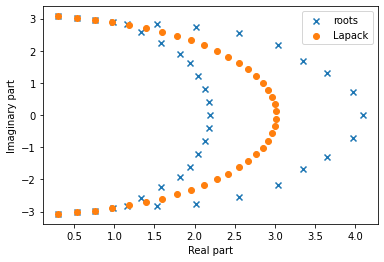

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
n = 40
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
# print(a)
ev = np.linalg.eigvals(a)
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print('Coefficients of the polynomial:', cf)
#print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='roots')
# b = a + 0 * np.random.randn(n, n)
# ev_b = np.linalg.eigvals(b)
plt.scatter(ev.real, ev.imag, marker='o', label='Lapack')
# plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

In [ ]:
np.linalg.qr(A)

(array([[-0.17159382,  0.01782816,  0.02507445, ..., -0.00505849,
         -0.01252549,  0.04001099],
        [-0.0571821 , -0.22320694,  0.03245813, ..., -0.00819441,
         -0.02686892,  0.01532162],
        [-0.10880394, -0.05855765, -0.11243104, ..., -0.02004959,
         -0.01118578, -0.03207087],
        ...,
        [-0.07196561, -0.05356336, -0.04084064, ..., -0.01387182,
         -0.0444451 , -0.00851206],
        [-0.21747108, -0.17888945,  0.01869124, ...,  0.21599453,
         -0.11585284,  0.03699648],
        [ 0.00276096, -0.11629488, -0.12582458, ..., -0.05880131,
          0.03252362,  0.03811829]]),
 array([[-1.44045169e+01, -7.18270488e+00, -1.21604976e+01, ...,
         -9.95799742e+00, -2.01360395e+01, -2.79355930e+00],
        [ 0.00000000e+00, -2.29315343e+01, -8.53200993e+00, ...,
         -5.81461795e+00, -1.97404996e+01, -8.84271610e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.46478975e+01, ...,
         -7.06117357e+00, -6.06097491e+00, -1.44957360e+

In [ ]:
A = np.random.randn(n, n)
A = A.T + A - 10 * np.eye(n)
s = np.linalg.svd(A, compute_uv=False)
print(s)
np.linalg.eigvalsh(A)

[24.94871704 24.40487178 23.79708952 23.14866217 21.40554078 19.71163727
 19.26493502 18.49746326 17.93554742 17.19606922 16.32154539 15.47682616
 14.75076652 14.60901996 14.01071526 13.15681389 12.42722994 11.67971819
 10.86719754 10.31352862  9.37851182  9.24625357  8.14463137  7.9223374
  7.14366449  6.69191094  5.96177662  5.87648767  5.71325322  4.92003944
  4.64949277  4.38150135  2.74969129  2.40156133  1.94422769  1.80777669
  1.13239097  0.72296108  0.55088022  0.21484911]


array([-24.94871704, -24.40487178, -23.79708952, -23.14866217,
       -21.40554078, -19.71163727, -19.26493502, -18.49746326,
       -17.93554742, -17.19606922, -16.32154539, -15.47682616,
       -14.75076652, -14.60901996, -14.01071526, -13.15681389,
       -12.42722994, -11.67971819, -10.86719754, -10.31352862,
        -9.37851182,  -9.24625357,  -8.14463137,  -7.9223374 ,
        -7.14366449,  -6.69191094,  -5.96177662,  -4.92003944,
        -4.38150135,  -2.74969129,  -1.94422769,  -1.13239097,
        -0.55088022,  -0.21484911,   0.72296108,   1.80777669,
         2.40156133,   4.64949277,   5.71325322,   5.87648767])

In [ ]:
def power_method(A, x0, num_iter):
    x = x0.copy()
    for i in range(num_iter):
        x = A @ x 
        x = x / np.linalg.norm(x)
    return x

In [ ]:
v = power_method(A, np.random.randn(n), 1000)

In [ ]:
v, np.linalg.norm(v)

(array([ 0.25985568, -0.12796617,  0.0730096 ,  0.05382197, -0.10520749,
         0.02593144, -0.02943074,  0.09459162,  0.07388383, -0.28728863,
        -0.08059549,  0.09965786, -0.03740553,  0.2131939 ,  0.22730344,
        -0.25421595,  0.0100683 , -0.0897097 , -0.05680905, -0.15879122,
         0.18706247,  0.01404265,  0.01055132,  0.10543405,  0.12786534,
         0.27032988,  0.12423125,  0.22969457,  0.1153521 , -0.24688728,
         0.17321903,  0.09939966, -0.31296817,  0.16137739,  0.2392383 ,
         0.09200377,  0.16356604,  0.10104588, -0.18117772,  0.06707298]),
 0.9999999999999998)

$$ Av = \lambda v $$

$$v^{\top} Av = \lambda v^{\top}v = \lambda \|v\|_2^2 = \lambda$$

$$ A = UVU^{\top},$$ $U$ is orthogonal and $V$ is diagonal with eigenvalues in the diagonal

$$ A - \mu I = UVU^{\top} - \mu UU^{\top} = U(V - \mu I)U^{\top}$$

In [ ]:
v @ A @ v 

-24.948717038265936

In [ ]:
np.linalg.eigvalsh(A)

array([-24.94871704, -24.40487178, -23.79708952, -23.14866217,
       -21.40554078, -19.71163727, -19.26493502, -18.49746326,
       -17.93554742, -17.19606922, -16.32154539, -15.47682616,
       -14.75076652, -14.60901996, -14.01071526, -13.15681389,
       -12.42722994, -11.67971819, -10.86719754, -10.31352862,
        -9.37851182,  -9.24625357,  -8.14463137,  -7.9223374 ,
        -7.14366449,  -6.69191094,  -5.96177662,  -4.92003944,
        -4.38150135,  -2.74969129,  -1.94422769,  -1.13239097,
        -0.55088022,  -0.21484911,   0.72296108,   1.80777669,
         2.40156133,   4.64949277,   5.71325322,   5.87648767])